## Main aim of this project is to detect it will rain or not the next day with the help of weather details.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download
df = pd.read_csv('./weatherAUS.csv')
pd.set_option('display.max_columns',None) # this is done to display all the columns.

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
# Data Analysis and Handling Missing Values

In [5]:
# No. of unique values each columns has
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
# dividing our features into different types(categories).

num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [7]:
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [8]:
discrete_var

['Cloud9am', 'Cloud3pm']

In [9]:
cont_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
categ_var

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

### Handling Missing Values

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
# percentage of null values

df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [13]:
def find_feature_type(feature):
    """ finds which feature is of which type: discrete, continuous or categorical."""
    if feature in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(feature))
    elif feature in cont_var:
        print("{} is a Numerical Variable, Continuous in nature".format(feature))
    else:
        print("{} is a Categorical Variable".format(feature))

In [14]:
find_feature_type('Cloud9am')

Cloud9am is a Numerical Variable, Discrete in nature


## Doing Random Sample Imputation for the variables which are having the most percentage of Null values.

In [15]:
# df['Cloud9am'].dropna().sample(df['Cloud9am'].isnull())
# df['Cloud9am'].isnull().sum()
# df['Cloud9am'].dropna().sample(df['Cloud9am'].isnull().sum())

In [16]:
def RandomSampleImputation(df, feature):
    df[feature] = df[feature]
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_sample

In [17]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [18]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Replacing the null values of all continuous feature which are having less no. of null values.

In [19]:
def MeanImputaion(df, feature):
    df[feature] = df[feature]
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)

In [20]:
MeanImputaion(df, 'Pressure3pm')
MeanImputaion(df, 'Pressure9am')
MeanImputaion(df, 'MinTemp')
MeanImputaion(df, 'MaxTemp')
MeanImputaion(df, 'Rainfall')
MeanImputaion(df, 'WindGustSpeed')
MeanImputaion(df, 'WindSpeed9am')
MeanImputaion(df, 'WindSpeed3pm')
MeanImputaion(df, 'Pressure9am')
MeanImputaion(df, 'Humidity9am')
MeanImputaion(df, 'Humidity3pm')
MeanImputaion(df, 'Temp3pm')
MeanImputaion(df, 'Temp9am')

In [21]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [22]:
# Now, only categorical features are left from which null values needs to be replaced.
# It is handled in the Label Encoding part.

## Plotting a HeatMap to show how features are correlated.

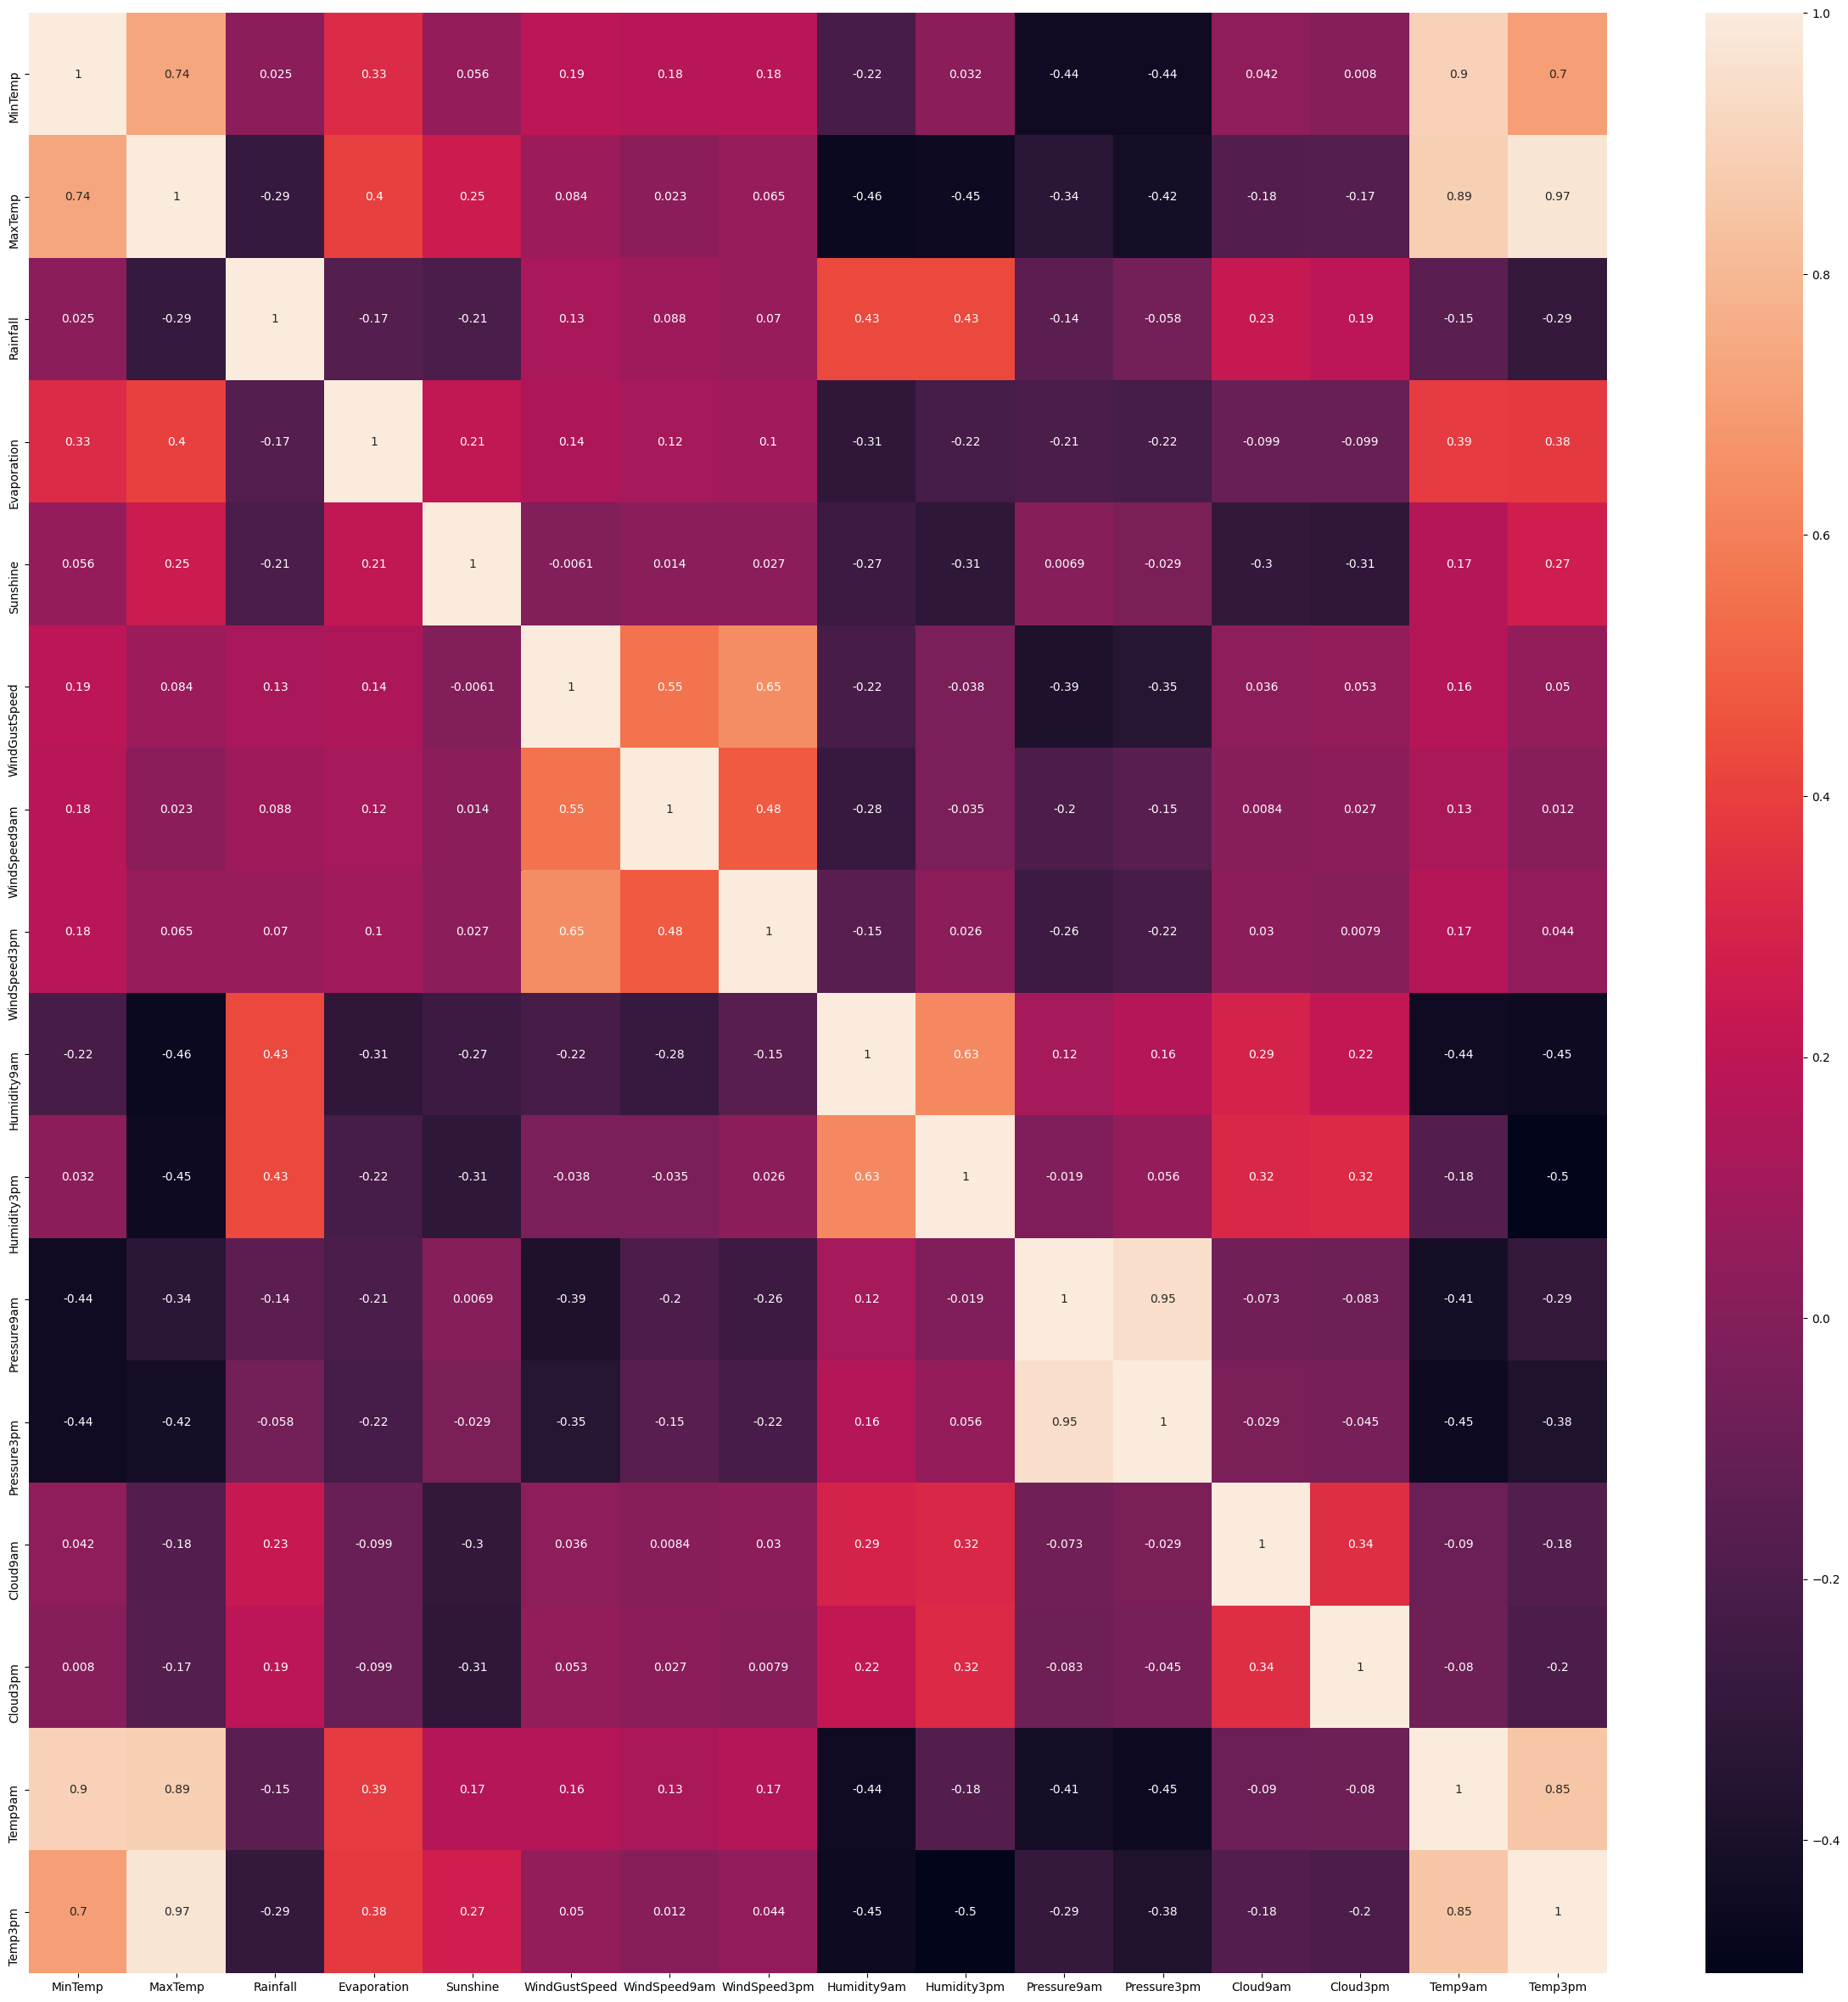

In [23]:
corrmat = df.corr(method="spearman")
plt.figure(figsize=(30,30))
g = sns.heatmap(corrmat,annot=True)

In [24]:
# Analysis for Continuous features.

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


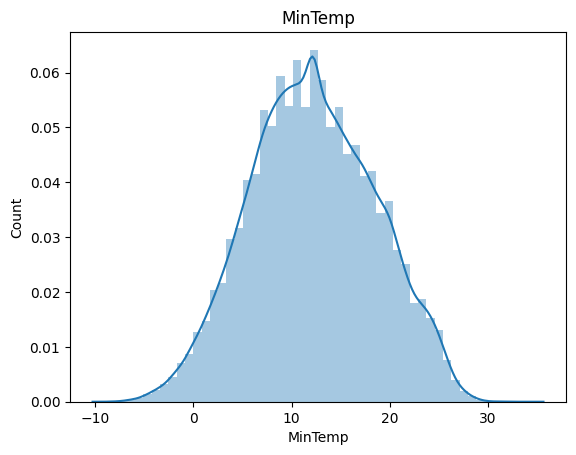

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


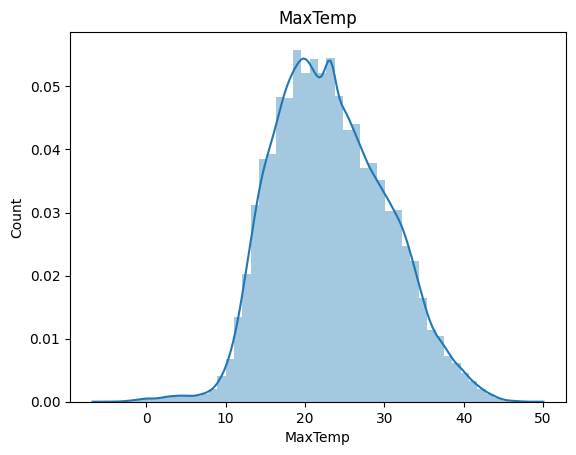

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


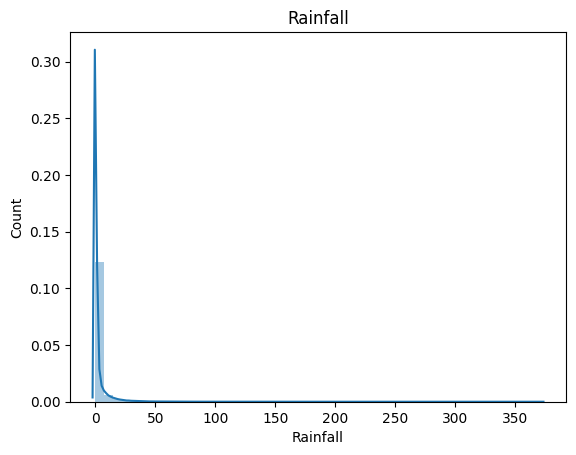

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


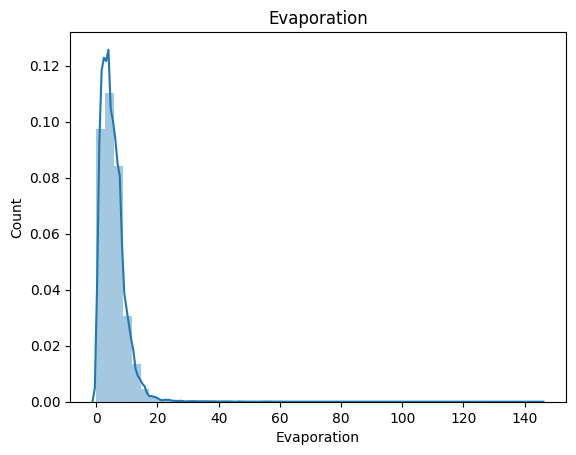

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


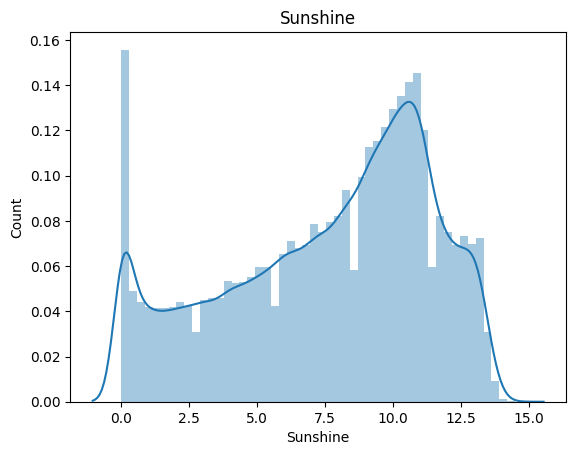

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


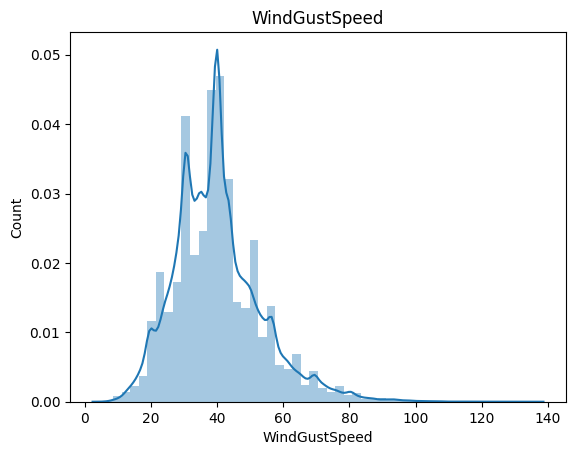

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


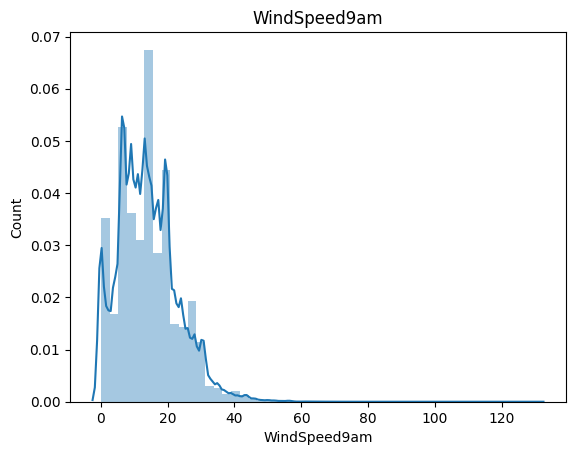

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


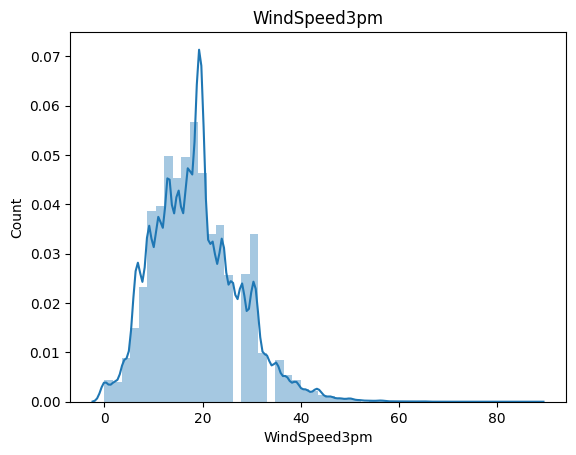

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


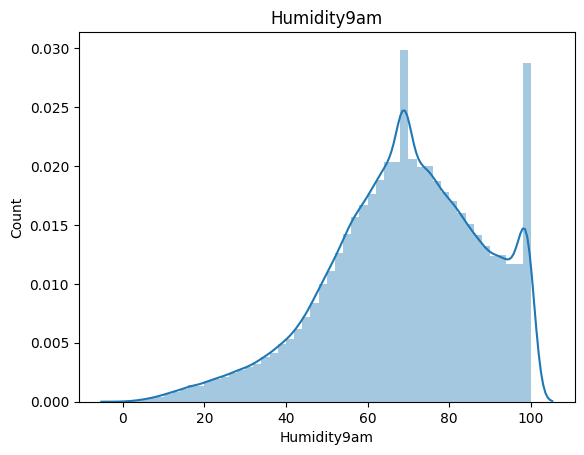

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


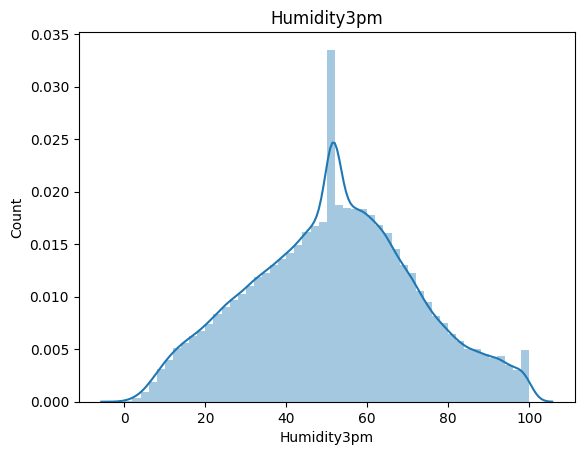

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


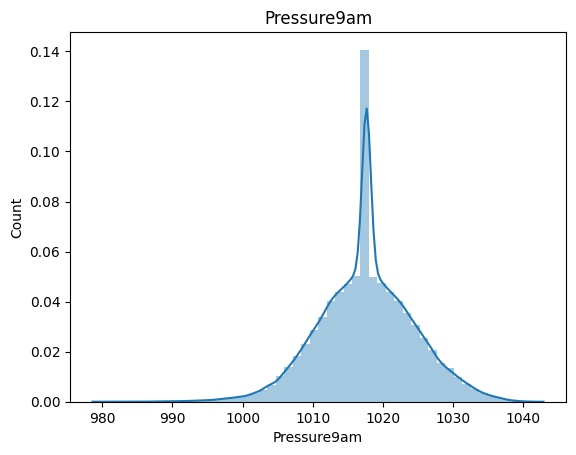

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


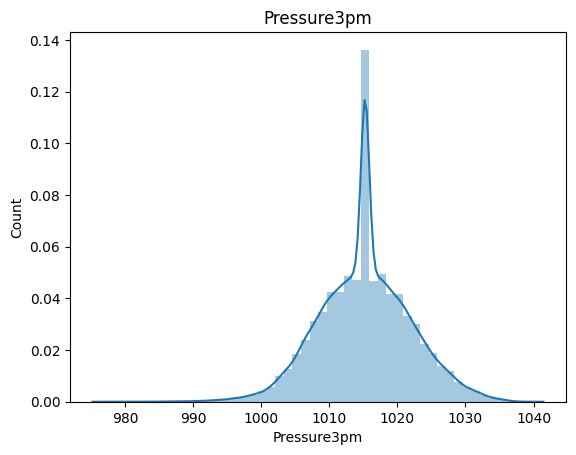

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


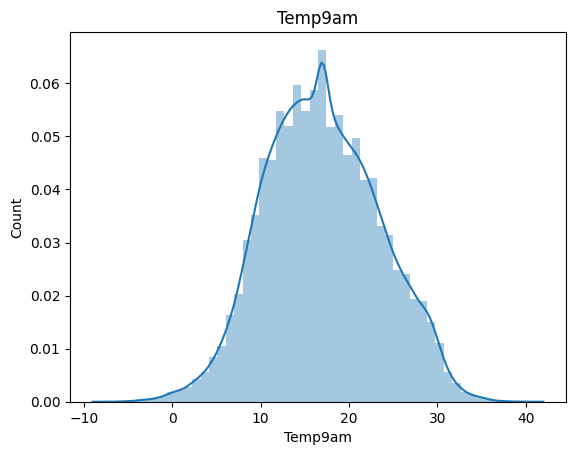

<Figure size 1500x1500 with 0 Axes>

/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


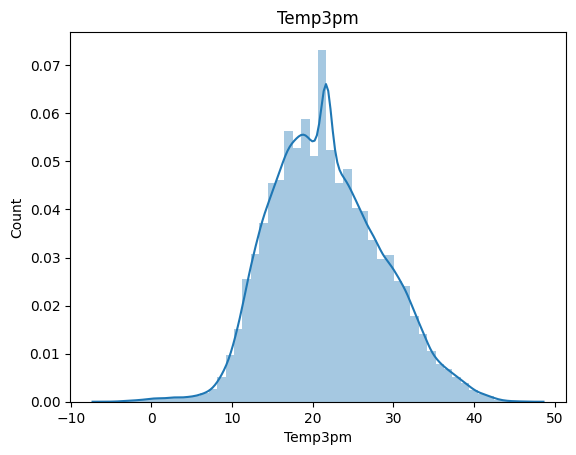

<Figure size 1500x1500 with 0 Axes>

In [25]:
# Using distribution plot 
for feature in cont_var:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

## Feature Engineering Part Starts From Here

In [26]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [27]:
pd.get_dummies(df["RainToday"])

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145455,1,0
145456,1,0
145457,1,0
145458,1,0


In [28]:
# One Hot Encoding: Converts each category into individual features whose values are either 0 or 1.
# drop_first drops the previous one.
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first=True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [29]:
# Label Encoding(where there are more categorical values):
# Assigning values for each categorical values on the basis of their weights.

# arranging feature values of each categorical features on the basis of their impact.
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2008-01-19', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-05-02', '2008-05-01', '2008-04-30', '2008-04-29', '2008-04-28',
       '2008-04-26', '2008-04-25', '2016-11-26', '2012-04-07', '2008-08-17'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [30]:
windgustdir = {'NNW': 0, 'NW': 1, 'WNW': 2, 'N': 3, 'W': 4, 'WSW': 5, 'NNE': 6, 'S': 7, 'SSW': 8, 'SW': 9, 'SSE': 10,
       'NE': 11, 'SE': 12, 'ESE': 13, 'ENE': 14, 'E': 15}
winddir9am = {'NNW': 0, 'N': 1, 'NW': 2, 'NNE': 3, 'WNW': 4, 'W': 5, 'WSW': 6, 'SW': 7, 'SSW': 8, 'NE': 9, 'S': 10,
       'SSE': 11, 'ENE': 12, 'SE':13, 'ESE': 14, 'E': 15}
winddir3pm = {'NW': 0, 'NNW': 1, 'N': 2, 'WNW': 3, 'W': 4, 'NNE': 5, 'WSW': 6, 'SSW': 7, 'S': 8, 'SW': 9, 'SE': 10,
       'NE': 11, 'SSE': 12, 'ENE': 13, 'E': 14, 'ESE': 15}


df['WindGustDir'] = df['WindGustDir'].map(windgustdir)
df['WindDir9am'] = df['WindDir9am'].map(winddir9am)
df['WindDir3pm'] = df['WindDir3pm'].map(windgustdir)

In [31]:
df['WindGustDir'].value_counts().index

Float64Index([ 4.0, 12.0,  3.0, 10.0, 15.0,  7.0,  5.0,  9.0,  8.0,  2.0,  1.0,
              14.0, 13.0, 11.0,  0.0,  6.0],
             dtype='float64')

In [32]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0])

In [33]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [34]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,2.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,15.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [35]:
# Now Label Encoding in done for 'Location' feature according to our Target feature.

df_loc = df.groupby(['Location'])['RainTomorrow'].value_counts().sort_values().unstack()

In [36]:
df_loc.head()

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [37]:
df_loc[1].sort_values(ascending=False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [38]:
df_loc[1].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [39]:
len(df_loc[1].sort_values(ascending=False).index)

49

In [40]:
loc_indexes = list(df_loc[1].sort_values(ascending=False).index)

In [41]:
loc_indexes

['Portland',
 'Cairns',
 'Walpole',
 'Dartmoor',
 'MountGambier',
 'NorfolkIsland',
 'Albany',
 'Witchcliffe',
 'CoffsHarbour',
 'Sydney',
 'Darwin',
 'MountGinini',
 'NorahHead',
 'Ballarat',
 'GoldCoast',
 'SydneyAirport',
 'Hobart',
 'Watsonia',
 'Newcastle',
 'Wollongong',
 'Brisbane',
 'Williamtown',
 'Launceston',
 'Adelaide',
 'MelbourneAirport',
 'Perth',
 'Sale',
 'Melbourne',
 'Canberra',
 'Albury',
 'Penrith',
 'Nuriootpa',
 'BadgerysCreek',
 'Tuggeranong',
 'PerthAirport',
 'Bendigo',
 'Richmond',
 'WaggaWagga',
 'Townsville',
 'PearceRAAF',
 'SalmonGums',
 'Moree',
 'Cobar',
 'Mildura',
 'Katherine',
 'AliceSprings',
 'Nhil',
 'Woomera',
 'Uluru']

In [42]:
mapped_location = {}

for index,location in enumerate(loc_indexes):
    mapped_location[location] = index + 1
    

In [43]:
mapped_location

{'Portland': 1,
 'Cairns': 2,
 'Walpole': 3,
 'Dartmoor': 4,
 'MountGambier': 5,
 'NorfolkIsland': 6,
 'Albany': 7,
 'Witchcliffe': 8,
 'CoffsHarbour': 9,
 'Sydney': 10,
 'Darwin': 11,
 'MountGinini': 12,
 'NorahHead': 13,
 'Ballarat': 14,
 'GoldCoast': 15,
 'SydneyAirport': 16,
 'Hobart': 17,
 'Watsonia': 18,
 'Newcastle': 19,
 'Wollongong': 20,
 'Brisbane': 21,
 'Williamtown': 22,
 'Launceston': 23,
 'Adelaide': 24,
 'MelbourneAirport': 25,
 'Perth': 26,
 'Sale': 27,
 'Melbourne': 28,
 'Canberra': 29,
 'Albury': 30,
 'Penrith': 31,
 'Nuriootpa': 32,
 'BadgerysCreek': 33,
 'Tuggeranong': 34,
 'PerthAirport': 35,
 'Bendigo': 36,
 'Richmond': 37,
 'WaggaWagga': 38,
 'Townsville': 39,
 'PearceRAAF': 40,
 'SalmonGums': 41,
 'Moree': 42,
 'Cobar': 43,
 'Mildura': 44,
 'Katherine': 45,
 'AliceSprings': 46,
 'Nhil': 47,
 'Woomera': 48,
 'Uluru': 49}

In [44]:
df["Location"] = df["Location"].map(mapped_location)

In [45]:
# Mapping Date

df["Date"] = pd.to_datetime(df["Date"], format= "%Y-%m-%d", errors="coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] =df["Date"].dt.day

In [46]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,2.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,15.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


/home/suyen/Documents/Untitled Folder/mlenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

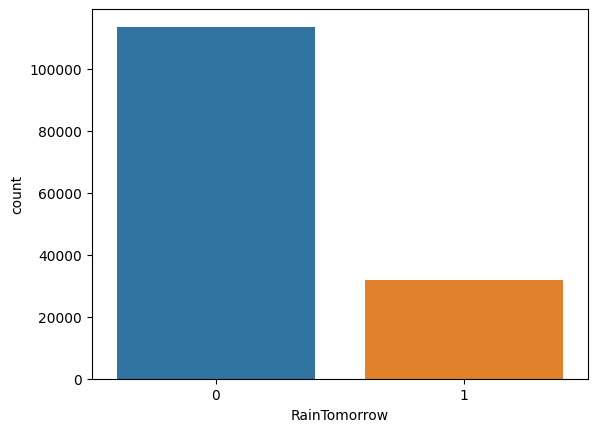

In [47]:
sns.countplot(df["RainTomorrow"])

In [48]:
df = df.drop(["Date"],axis=1)

In [49]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,2.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,15.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


## Splitting Data

In [50]:
x = df.drop(["RainTomorrow"],axis=1)
y = df["RainTomorrow"]

In [51]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x)

StandardScaler()

In [52]:
X = scale.transform(x)

In [53]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [54]:
X = pd.DataFrame(X,columns=x.columns)

In [55]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.415017,0.189447,-0.045336,-0.210072,-0.727927,0.182347,-0.740424,0.302234,-0.406066,-1.242925,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.230562,-1.657694,-0.014053,0.017023,-0.529795,1.634076,-1.672844
1,0.415017,-0.753101,0.265043,-0.281650,-0.442930,0.631373,-1.187566,0.302234,-1.439618,-0.583015,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.884261,-1.289981,0.032464,0.381985,-0.529795,1.634076,-1.559140
2,0.415017,0.110901,0.349692,-0.281650,-0.680427,-0.847773,-0.516853,0.454694,-0.406066,-0.583015,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,1.230562,-0.922267,0.621685,0.221402,-0.529795,1.634076,-1.445436
3,0.415017,-0.470337,0.674180,-0.281650,3.072032,0.340827,0.824574,-1.222364,1.247616,1.616683,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-1.539848,0.180874,0.172017,0.703151,-0.529795,1.634076,-1.331732
4,0.415017,0.833521,1.280830,-0.162353,-0.015435,-1.217559,-0.740424,0.073544,1.040905,-1.462895,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.884261,1.284015,0.125499,1.170302,-0.529795,1.634076,-1.218028


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: uint8

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20 % data goes to the test set

## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
ranfor = RandomForestClassifier(n_estimators=100,random_state=0)

In [61]:
# X_train.head()
ranfor.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [62]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
138175,1.577892,1.524722,2.282509,-0.090775,1.362051,1.027573,-1.634708,1.293223,0.420775,-1.022955,0.672222,1.644841,-1.001386,-1.247568,-1.359889,-1.674066e+00,-0.847245,0.548588,1.986195,2.002415,1.887521,1.634076,-1.445436
38638,0.996454,1.304794,2.014454,-0.281650,0.887056,0.208760,-1.187566,1.445683,1.040905,-1.022955,0.333660,0.153426,-1.160497,-1.442965,-0.705949,-1.313919e+00,-0.154643,0.916301,1.598550,2.046210,-0.529795,-1.575495,-0.876915
124058,1.214493,-1.114411,-0.849501,-0.257790,-0.324181,-0.081786,-0.740424,0.759614,-0.612777,-0.802985,1.575051,0.382874,-0.046717,-0.026335,0.000000,-1.705998e-14,-0.500944,-0.554553,-1.068448,-0.815090,-0.529795,0.466959,0.032717
99214,-0.021061,-0.046190,-0.905934,-0.162353,-0.870425,0.842679,0.377432,-0.917445,-0.612777,0.296864,-0.343462,-0.649644,0.589729,1.341445,0.126338,3.667662e-01,-0.500944,-0.922267,-0.417204,-0.946476,-0.529795,0.466959,1.738279
25097,0.487696,-0.737392,-0.271067,-0.281650,-0.775426,1.450186,0.824574,-1.908434,0.007354,-0.363046,-1.359145,-1.337990,1.014027,0.022514,0.000000,-1.705998e-14,-1.193546,1.284015,-0.510239,-0.085166,-0.529795,0.466959,1.397167


In [63]:
y_pred = ranfor.predict(X_test)

In [64]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [65]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[21772   954]
 [ 3331  3035]]
85.2708648425684
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



## K Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
138175,1.577892,1.524722,2.282509,-0.090775,1.362051,1.027573,-1.634708,1.293223,0.420775,-1.022955,0.672222,1.644841,-1.001386,-1.247568,-1.359889,-1.674066e+00,-0.847245,0.548588,1.986195,2.002415,1.887521,1.634076,-1.445436
38638,0.996454,1.304794,2.014454,-0.281650,0.887056,0.208760,-1.187566,1.445683,1.040905,-1.022955,0.333660,0.153426,-1.160497,-1.442965,-0.705949,-1.313919e+00,-0.154643,0.916301,1.598550,2.046210,-0.529795,-1.575495,-0.876915
124058,1.214493,-1.114411,-0.849501,-0.257790,-0.324181,-0.081786,-0.740424,0.759614,-0.612777,-0.802985,1.575051,0.382874,-0.046717,-0.026335,0.000000,-1.705998e-14,-0.500944,-0.554553,-1.068448,-0.815090,-0.529795,0.466959,0.032717
99214,-0.021061,-0.046190,-0.905934,-0.162353,-0.870425,0.842679,0.377432,-0.917445,-0.612777,0.296864,-0.343462,-0.649644,0.589729,1.341445,0.126338,3.667662e-01,-0.500944,-0.922267,-0.417204,-0.946476,-0.529795,0.466959,1.738279
25097,0.487696,-0.737392,-0.271067,-0.281650,-0.775426,1.450186,0.824574,-1.908434,0.007354,-0.363046,-1.359145,-1.337990,1.014027,0.022514,0.000000,-1.705998e-14,-1.193546,1.284015,-0.510239,-0.085166,-0.529795,0.466959,1.397167


In [70]:
y_pred3 = knn.predict(X_test)

In [71]:
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3)*100)
print(classification_report(y_test,y_pred3))

[[20922  1804]
 [ 3415  2951]]
82.06036023649114
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     22726
           1       0.62      0.46      0.53      6366

    accuracy                           0.82     29092
   macro avg       0.74      0.69      0.71     29092
weighted avg       0.81      0.82      0.81     29092



## Saving the best model in our joblib file

In [72]:
from joblib import dump,load

In [73]:
dump(ranfor,'rainfall_RanForest_model.joblib')

['rainfall_RanForest_model.joblib']

In [74]:
loaded_model = load('rainfall_RanForest_model.joblib')

In [75]:
research_data = [[1.577892,1.524722,2.282509,-0.090775,1.362051,1.027573,-1.634708,1.293223,0.420775,-1.022955,0.672222,1.644841,-1.001386,-1.247568,-1.359889,-1.674066e+00,-0.847245,0.548588,1.986195,2.002415,1.887521,1.634076,-1.445436]]

In [76]:
loaded_model.predict(research_data) # the model has predicted that it will not rain based on provided data.

array([0], dtype=uint8)